# Estadística Aplicada
## Cinthya Yesenia López Díaz 1658003
### Sesión 8 a 24 feb 2023

In [2]:
#pip install lifelines 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from lifelines import ExponentialFitter

In [4]:
#diccionario 1
dic1 = {'tiempo': [5,8,12,24,32,17,16,17,19,30],
       'recaida': [1,1,1,1,1,1,0,0,0,0]}

In [5]:
datos = pd.DataFrame(dic1)

In [6]:
datos

,tiempo,recaida
0,5,1
1,8,1
2,12,1
3,24,1
4,32,1
5,17,1
6,16,0
7,17,0
8,19,0
9,30,0


Suponer función de supervivencia exponencial

$f(t)=\lambda e^{-\lambda t}, h(t) =\lambda$

$\hat{\lambda} = \frac{\sum \delta_i} {\sum t_i}$

In [7]:
ex1 = ExponentialFitter().fit(datos['tiempo'],datos['recaida'])

In [9]:
#f(t)=(1/lambda)e^-(t/lambda)
ex1.summary

,coef,se(coef),coef lower 95%,coef upper 95%,cmp to,z,p,-log2(p)
lambda_,30.0,12.247449,5.995442,54.004558,0.0,2.44949,0.014306,6.127248


In [10]:
ex1.hazard_

,Exponential_estimate
5.0,0.033333
8.0,0.033333
11.0,0.033333
14.0,0.033333
17.0,0.033333
20.0,0.033333
23.0,0.033333
26.0,0.033333
29.0,0.033333
32.0,0.033333


In [11]:
nuestra_lambda = datos['recaida'].sum()/datos['tiempo'].sum()

In [12]:
nuestra_lambda

0.03333333333333333

In [13]:
ex1.survival_function_at_times(16)

16    0.586646
Name: Exponential_estimate, dtype: float64

1. Función de densidad de probabilidad 
2. Función de supervivencia
3. Función de riesgo
4. Función acumulada

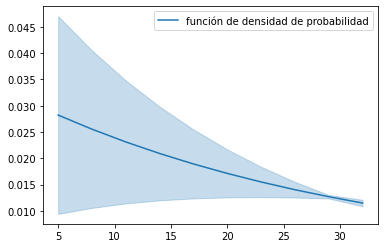

In [15]:
ex1.plot_density(label="función de densidad de probabilidad");

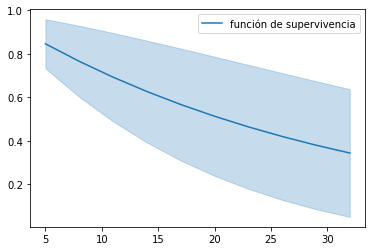

In [16]:
ex1.plot_survival_function(label="función de supervivencia"); #el area sombreada es el intervalo de confianza

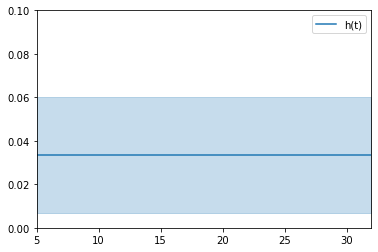

In [20]:
ex1.plot_hazard(label='h(t)');
plt.ylim(0,0.1);
plt.xlim(5,32);

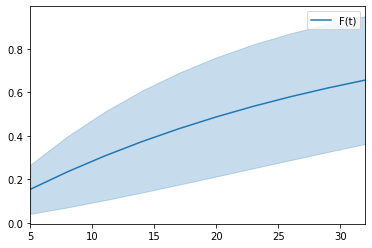

In [22]:
ex1.plot_cumulative_density(label='F(t)');
plt.xlim(5,32);

In [27]:
ex1.median_survival_time_ 

20.794415437592868

En el mes 20.8 el 50% de los pacientes ya han sufrido la recaida de la enfermedad.

In [23]:
from lifelines.datasets import load_rossi

In [25]:
rossi = load_rossi()

In [26]:
rossi

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...
427,52,0,1,31,0,1,0,1,3
428,52,0,0,20,1,0,0,1,1
429,52,0,1,20,1,1,1,1,1
430,52,0,0,29,1,1,0,1,3


In [28]:
#week = tiempo en que ocurre el evento (carcel) en un año, fin = le dieron el dinero al liberarlo, 
#wexp = experiencia laboral, prio =veces en las que ha sido arrestado, mar = casado, paro = libertad condicional.

¿si el tiempo de supervivencia (el tiempo de volver a ser arrestado) es exponencial, webull o lognormal?

In [29]:
ex2 = ExponentialFitter().fit(rossi['week'], rossi['arrest'])

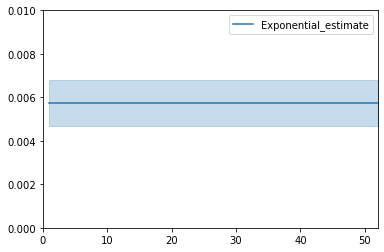

In [32]:
ex2.plot_hazard();
plt.ylim(0,0.01);
plt.xlim(0,52);

In [33]:
ex2.hazard_

,Exponential_estimate
1.000000,0.005755
1.118329,0.005755
1.236659,0.005755
1.354988,0.005755
1.473318,0.005755
...,...
51.526682,0.005755
51.645012,0.005755
51.763341,0.005755
51.881671,0.005755


In [34]:
from lifelines import WeibullFitter

In [35]:
weib1 = WeibullFitter().fit(rossi['week'],rossi['arrest'])

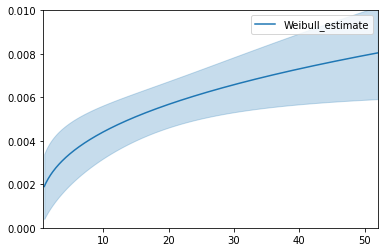

In [38]:
#entre más tiempo pase, más probable que vuelvan a arrestarte
weib1.plot_hazard()
plt.ylim(0,0.01)
plt.xlim(0.8,52);

In [39]:
from lifelines import LogNormalFitter 

In [40]:
logn1 = LogNormalFitter().fit(rossi['week'],rossi['arrest'])

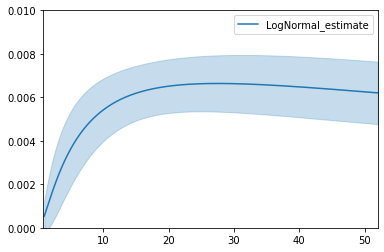

In [41]:
#entre más pase el tiempo, menos probabilidad tienes que vuelvan..
logn1.plot_hazard()
plt.ylim(0,0.01)
plt.xlim(0.8,52);

Para comparar modelos y elegir el "mejor" se suele utilizar el criterio de Información de Akaike (AIC) cuya formula es $AIC = -2Log(L) + 2k$ donde k es el número de parámetros a estimar.

El "mejor" modelo es el que tiene el menor valor del AIC.
El criterio de Akaike "prefiere" modelos más simples en lugar de complejos.

In [42]:
ex2.print_summary()

C:\Users\Lenovo\anaconda3\lib\site-packages\lifelines\utils\printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 432 total observations, 318 right-censored observations>
   number of observations = 432
number of events observed = 114
           log-likelihood = -701.98
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_ 173.76      16.27           141.87           205.66

          cmp to     z      p   -log2(p)
lambda_     0.00 10.68 <0.005      85.99
---
AIC = 1405.95

In [49]:
print(f'exponencial {ex2.AIC_.round(2)}, weibull {weib1.AIC_.round(2)}, lognormal {logn1.AIC_.round(2)}')

exponencial 1405.95, weibull 1397.25, lognormal 1399.82


De acuerdo con el criterio de Akaike (AIC) el modelo que mejor estima el tiempo de supervivencia de volver a ser arrestado es el modelo Weibull. En esste modelo el riesgode volver a ser arrestado es creciente.

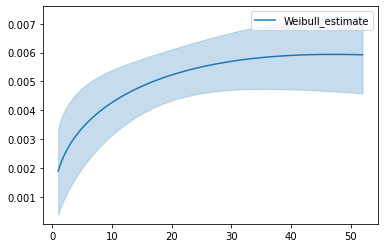

In [50]:
weib1.plot_density();

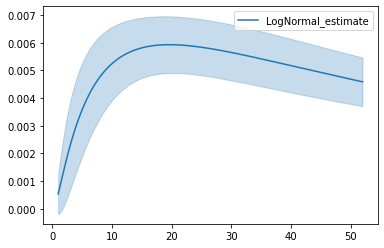

In [51]:
logn1.plot_density();